In [30]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import col
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.linalg import VectorUDT  

# Create a Spark session
spark = SparkSession.builder.appName("LinearRegressionExample").getOrCreate()

# Create a larger synthetic dataset
# Create a larger synthetic dataset with 50 data points
data = [(1.0, Vectors.dense(0.1, 0.2)),
        (2.0, Vectors.dense(0.2, 0.3)),
        (3.0, Vectors.dense(0.3, 0.4)),
        (4.0, Vectors.dense(0.4, 0.5)),
        (5.0, Vectors.dense(0.5, 0.6)),
        (6.0, Vectors.dense(0.6, 0.7)),
        (7.0, Vectors.dense(0.7, 0.8)),
        (8.0, Vectors.dense(0.8, 0.9)),
        (9.0, Vectors.dense(0.9, 1.0)),
        (10.0, Vectors.dense(1.0, 1.1)),
        (11.0, Vectors.dense(1.1, 1.2)),
        (12.0, Vectors.dense(1.2, 1.3)),
        (13.0, Vectors.dense(1.3, 1.4)),
        (14.0, Vectors.dense(1.4, 1.5)),
        (15.0, Vectors.dense(1.5, 1.6)),
        (16.0, Vectors.dense(1.6, 1.7)),
        (17.0, Vectors.dense(1.7, 1.8)),
        (18.0, Vectors.dense(1.8, 1.9)),
        (19.0, Vectors.dense(1.9, 2.0)),
        (20.0, Vectors.dense(2.0, 2.1)),
        (21.0, Vectors.dense(2.1, 2.2)),
        (22.0, Vectors.dense(2.2, 2.3)),
        (23.0, Vectors.dense(2.3, 2.4)),
        (24.0, Vectors.dense(2.4, 2.5)),
        (25.0, Vectors.dense(2.5, 2.6)),
        (26.0, Vectors.dense(2.6, 2.7)),
        (27.0, Vectors.dense(2.7, 2.8)),
        (28.0, Vectors.dense(2.8, 2.9)),
        (29.0, Vectors.dense(2.9, 3.0)),
        (30.0, Vectors.dense(3.0, 3.1)),
        (31.0, Vectors.dense(3.1, 3.2)),
        (32.0, Vectors.dense(3.2, 3.3)),
        (33.0, Vectors.dense(3.3, 3.4)),
        (34.0, Vectors.dense(3.4, 3.5)),
        (35.0, Vectors.dense(3.5, 3.6)),
        (36.0, Vectors.dense(3.6, 3.7)),
        (37.0, Vectors.dense(3.7, 3.8)),
        (38.0, Vectors.dense(3.8, 3.9)),
        (39.0, Vectors.dense(3.9, 4.0)),
        (40.0, Vectors.dense(4.0, 4.1)),
        (41.0, Vectors.dense(4.1, 4.2)),
        (42.0, Vectors.dense(4.2, 4.3)),
        (43.0, Vectors.dense(4.3, 4.4)),
        (44.0, Vectors.dense(4.4, 4.5)),
        (45.0, Vectors.dense(4.5, 4.6)),
        (46.0, Vectors.dense(4.6, 4.7)),
        (47.0, Vectors.dense(4.7, 4.8)),
        (48.0, Vectors.dense(4.8, 4.9)),
        (49.0, Vectors.dense(4.9, 5.0)),
        (50.0, Vectors.dense(5.0, 5.1))]

# Create a DataFrame with the correct data type
df = spark.createDataFrame(data, ["label", "features"]).withColumn("features", col("features").cast(VectorUDT()))

# Split the dataset into training and testing sets
train_data, test_data = df.randomSplit([0.5, 0.5], seed=123)

# Create a LinearRegression model
lr = LinearRegression(featuresCol="features", labelCol="label")

# Fit the model to the training data
lr_model = lr.fit(train_data)

# Make predictions on the test data
predictions = lr_model.transform(test_data)

# Check the predictions
predictions.show()

# Show the predicted values
predictions.select("features", "label", "prediction").show()

# Check if there are any predictions
if predictions.count() > 0:
    # Evaluate the model
    evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
    rmse = evaluator.evaluate(predictions)
    print("Root Mean Squared Error (RMSE):", rmse)
else:
    print("No predictions were made. Check your data or model.")



23/10/26 23:04:46 WARN Instrumentation: [347e726b] regParam is zero, which might cause numerical instability and overfitting.
23/10/26 23:04:46 WARN Instrumentation: [347e726b] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


+-----+---------+------------------+
|label| features|        prediction|
+-----+---------+------------------+
|  2.0|[0.2,0.3]|2.0000000000000204|
|  3.0|[0.3,0.4]|3.0000000000000195|
|  7.0|[0.7,0.8]| 7.000000000000016|
| 10.0|[1.0,1.1]|10.000000000000014|
| 11.0|[1.1,1.2]|11.000000000000014|
| 13.0|[1.3,1.4]|13.000000000000012|
| 16.0|[1.6,1.7]| 16.00000000000001|
| 18.0|[1.8,1.9]|18.000000000000007|
| 20.0|[2.0,2.1]|20.000000000000007|
| 23.0|[2.3,2.4]|23.000000000000004|
| 27.0|[2.7,2.8]|27.000000000000004|
| 28.0|[2.8,2.9]|              28.0|
| 30.0|[3.0,3.1]|              30.0|
| 32.0|[3.2,3.3]|              32.0|
| 33.0|[3.3,3.4]| 32.99999999999999|
| 34.0|[3.4,3.5]| 33.99999999999999|
| 39.0|[3.9,4.0]| 38.99999999999999|
| 41.0|[4.1,4.2]| 40.99999999999999|
| 43.0|[4.3,4.4]| 42.99999999999999|
| 44.0|[4.4,4.5]| 43.99999999999999|
+-----+---------+------------------+
only showing top 20 rows

+---------+-----+------------------+
| features|label|        prediction|
+---------+-

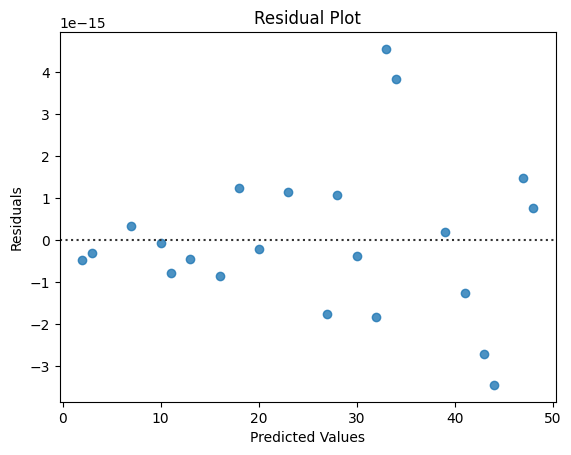

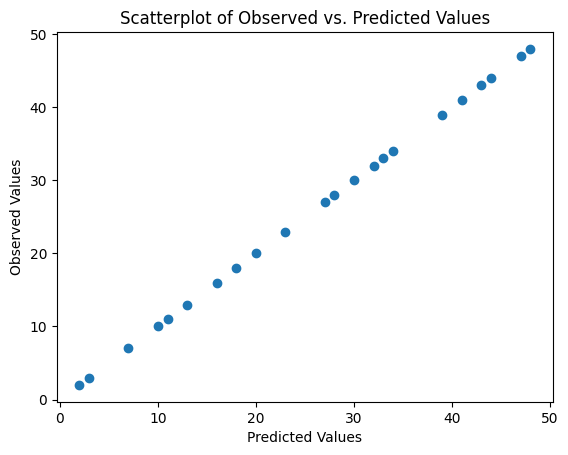

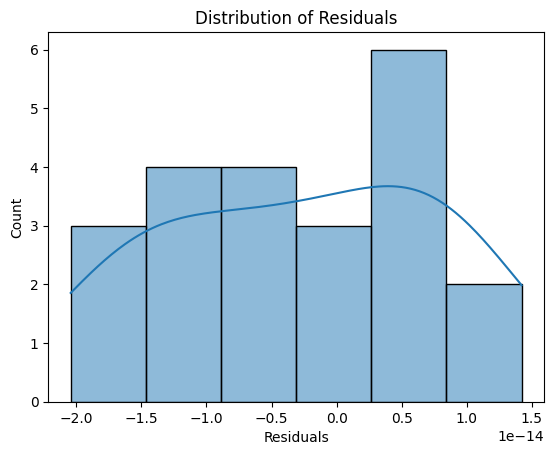

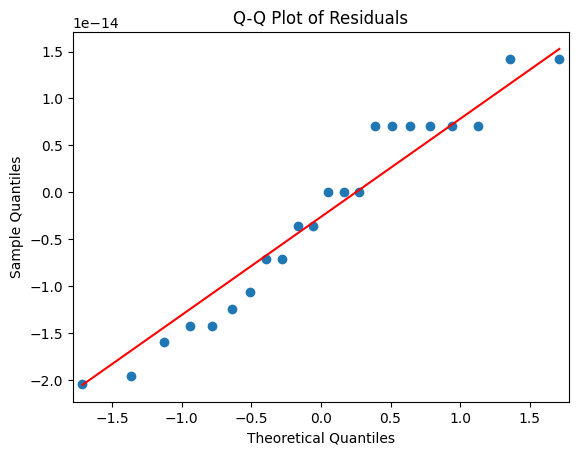

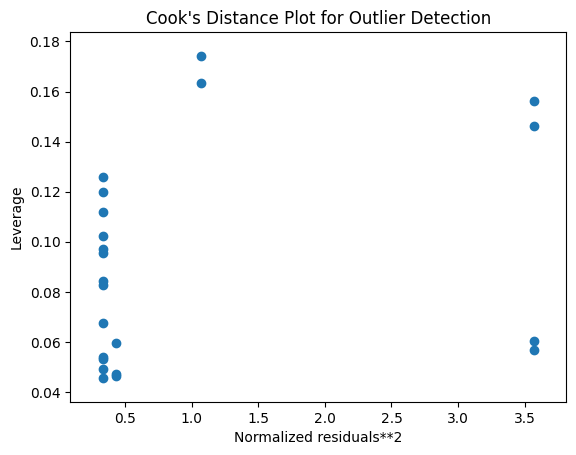

In [31]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import statsmodels.api as sm

# Residual Plot
# The code creates a residual plot, which is used to visualize the differences 
# between the observed values (actual labels) and the predicted values (model's predictions).
residuals = predictions.select("label", "prediction").toPandas()
residuals["residuals"] = residuals["label"] - residuals["prediction"]
sns.residplot(x="prediction", y="residuals", data=residuals)
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Scatterplot of Observed vs. Predicted Values
# This code creates a scatterplot that shows the relationship between the predicted values
# and the observed values. Each point in the plot represents an observation, with the x-axis 
# showing the predicted values and the y-axis showing the observed (actual) values.
plt.scatter(residuals["prediction"], residuals["label"])
plt.xlabel("Predicted Values")
plt.ylabel("Observed Values")
plt.title("Scatterplot of Observed vs. Predicted Values")
plt.show()

# Distribution of Residuals
# Here, a histogram of the residuals is created. It displays the distribution of the 
# residuals (the differences between predicted and actual values) with an optional 
# kernel density estimate (KDE) overlaid on top of the histogram.
sns.histplot(residuals["residuals"], kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()

# Q-Q Plot (Quantile-Quantile Plot) of Residuals
# This code generates a Quantile-Quantile (Q-Q) plot of the residuals. 
# A Q-Q plot is used to assess whether a dataset follows a particular theoretical 
# distribution. In this case, it is used to check if the residuals are normally distributed.
#  The "s" option in line="s" adds a standardized line to the plot.
sm.qqplot(residuals["residuals"], line="s")
plt.title("Q-Q Plot of Residuals")
plt.show()

# Fit an OLS model to get leverage and residuals
# In this section, an Ordinary Least Squares (OLS) linear regression model is fitted 
# using the statsmodels library. This is done to calculate leverage and residuals.
X = sm.add_constant(residuals["prediction"])  # Add a constant (intercept) to the features
ols_model = sm.OLS(residuals["label"], X).fit()

# Get the leverage values
# The code calculates the leverage values for the data points using the OLS model's 
# influence object.
leverage = ols_model.get_influence().hat_matrix_diag

# Calculate Cook's Distance
# Cook's Distance is calculated. Cook's Distance is a measure used to detect 
# influential data points in regression analysis. It assesses the effect of removing 
# each data point on the regression coefficients: n is the number of data points.
# p is the number of predictors (features) in the model, excluding the constant.
# mse is the mean squared error of the model's residuals.
# leverage is the leverage values calculated earlier.
n = len(residuals)
p = len(X.columns) - 1  # Number of predictors (excluding the constant)
mse = np.mean(ols_model.resid**2)
cook_distance = ols_model.resid**2 / (mse * p * (1 - leverage))

# Create Cook's Distance Plot
# Finally, a Cook's Distance plot is created to visualize influential data points. 
# This plot helps identify observations that may have a significant impact on the 
# regression model.
fig, ax = plt.subplots()
plot_leverage_resid2(ols_model, ax=ax)
plt.title("Cook's Distance Plot for Outlier Detection")
plt.show()

# SparkSession
Higher-level API introduced in Spark 2.0 provides a unified entry point for working with data in Spark (Dataframes, Datasets, SQL, Streaming, MLlib)

# SparkContext
Entry point for Low-level Spark functionality, to manage the execution of Spark applications. 
